In [ ]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for time series modeling and evaluation
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# For Google Colab file upload
from google.colab import files

In [ ]:
# Step 1: Data Loading and Preprocessing
# =======================================

# Upload the dataset
uploaded = files.upload()  # Allows file upload in Google Colab
file_name = list(uploaded.keys())[0]

# Load the dataset into a Pandas DataFrame
data = pd.read_excel(file_name)


Saving Final QoQ Data.xlsx to Final QoQ Data (4).xlsx


In [ ]:
# Display the first few rows of the data
print("Dataset Preview:")
print(data.head())

Dataset Preview:
         Date  GDP QoQ(%)  CPI QoQ(Numbers)  MIBOR QoQ(%)
0   2016 (Q1)       0.071          128.6667      0.065475
1   2016 (Q2)       0.073          131.0333      0.065082
2   2017 (Q3)       0.070          131.0000      0.062778
3   2017 (Q4)       0.061          130.6000      0.062022
4   2017 (Q1)       0.057          131.5000      0.062162


In [ ]:
# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

<ipython-input-100-ce405985107d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [ ]:
# Handle missing values (e.g., forward fill)
data.fillna(method='ffill', inplace=True)

<ipython-input-101-60afda2eccd9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Check for any remaining missing values
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
GDP QoQ(%)          0
CPI QoQ(Numbers)    0
MIBOR QoQ(%)        0
dtype: int64


In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
# =======================================
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       GDP QoQ(%)  CPI QoQ(Numbers)  MIBOR QoQ(%)
count   34.000000         34.000000     34.000000
mean     0.053967        155.829409      0.055428
std      0.065744         20.047455      0.012234
min     -0.239000        128.666700      0.033829
25%      0.047750        138.341675      0.044761
50%      0.064500        153.183350      0.060832
75%      0.075250        173.616650      0.064921
max      0.201000        193.400000      0.068543


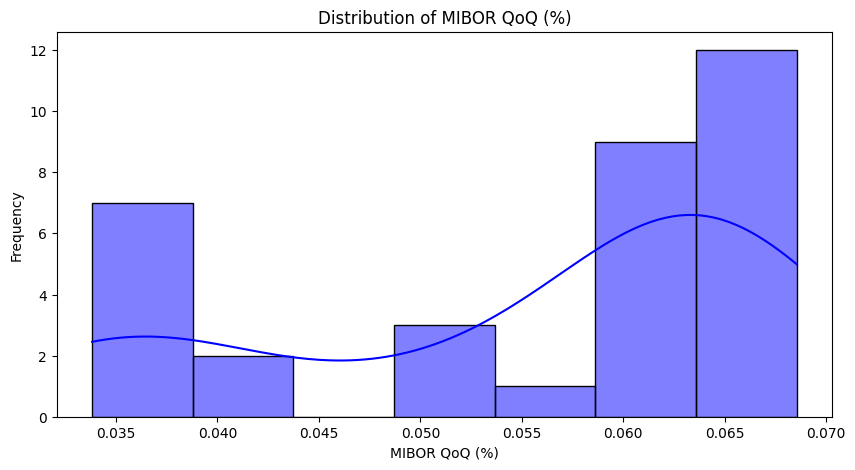

In [ ]:
# Plot distributions for each variable separately

# Plot for MIBOR (in %)
plt.figure(figsize=(10, 5))
sns.histplot(data['MIBOR QoQ(%)'], kde=True, color='blue')
plt.title("Distribution of MIBOR QoQ (%)")
plt.xlabel("MIBOR QoQ (%)")
plt.ylabel("Frequency")
plt.show()

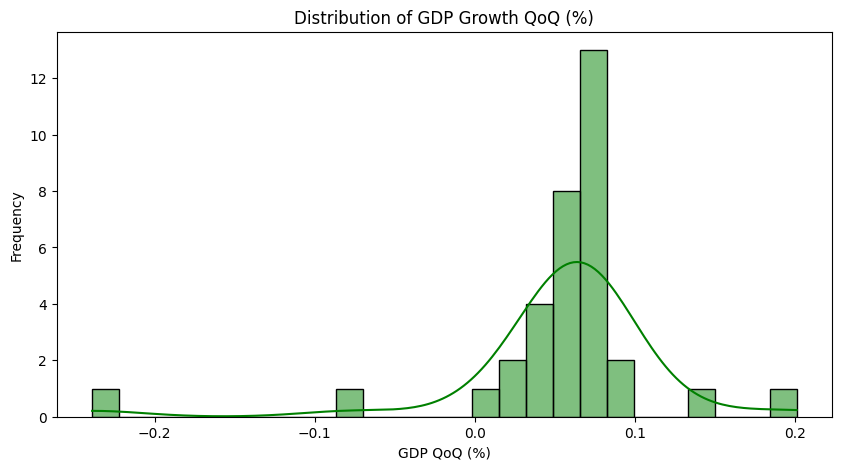

In [ ]:
# Plot for GDP Growth (in %)
plt.figure(figsize=(10, 5))
sns.histplot(data['GDP QoQ(%)'], kde=True, color='green')
plt.title("Distribution of GDP Growth QoQ (%)")
plt.xlabel("GDP QoQ (%)")
plt.ylabel("Frequency")
plt.show()


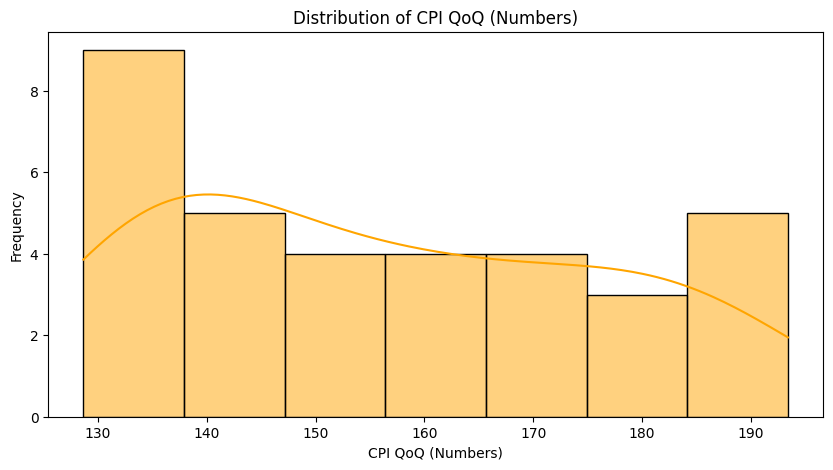

In [ ]:
# Plot for CPI (in numbers)
plt.figure(figsize=(10, 5))
sns.histplot(data['CPI QoQ(Numbers)'], kde=True, color='orange')
plt.title("Distribution of CPI QoQ (Numbers)")
plt.xlabel("CPI QoQ (Numbers)")
plt.ylabel("Frequency")
plt.show()

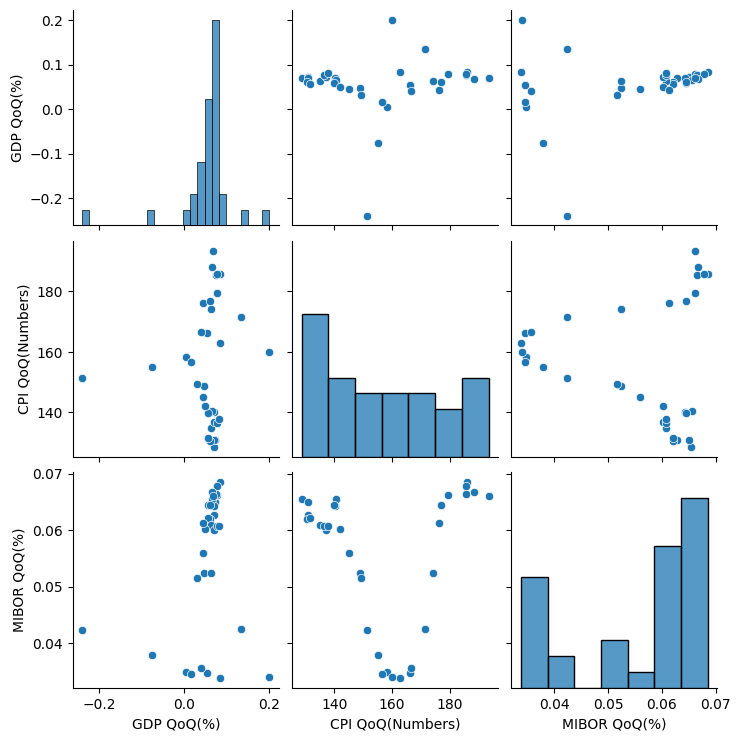

In [ ]:
# Scatter plots to visualize relationships
sns.pairplot(data)
plt.show()